In [1]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import json
import requests
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from math import sqrt
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import ipywidgets as widgets
from IPython.display import display

In [3]:
energy=[]
energydf = pd.DataFrame(energy)
apikey = "ozYyTy6PWPLaksKlBq7jq1ZyB0SpFcGOS8NcnN1c"
i=1
for i in range(0,3):
    if i==0:
        a=0
    else:
        a=i*5000+1
    url='https://api.eia.gov/v2/electricity/retail-sales/data?api_key=' + apikey + '&frequency=monthly&data[0]=customers&data[1]=price&data[2]=revenue&data[3]=sales&facets[stateid][]=ENC&facets[stateid][]=IL&facets[stateid][]=IN&facets[stateid][]=MI&facets[stateid][]=OH&facets[stateid][]=WI&sort[0][column]=period&sort[0][direction]=desc&offset=' + str(a) + '&&length=5000'
    #print(url)
    response=requests.get(url)
    response_dict = json.loads(response.text)
    data = response_dict["response"]["data"]
    df2= pd.DataFrame(data)
    energydf=pd.concat([energydf,df2])
    i=i+1

In [4]:
energydf.head()

,period,stateid,stateDescription,sectorid,sectorName,customers,price,revenue,sales,customers-units,price-units,revenue-units,sales-units
0,2024-09,IL,Illinois,ALL,all sectors,6005578,12.67,1425.49443,11250.10063,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
1,2024-09,ENC,East North Central,TRA,transportation,10,8.31,3.43544,41.33612,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
2,2024-09,ENC,East North Central,RES,residential,20894610,16.65,2504.46024,15042.19241,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
3,2024-09,ENC,East North Central,OTH,other,None,None,None,None,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
4,2024-09,ENC,East North Central,IND,industrial,53971,8.3,1300.05015,15663.92909,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours


In [5]:
url='https://api.eia.gov/v2/electricity/retail-sales/data?api_key=' + apikey + '&frequency=monthly&data[0]=customers&data[1]=price&data[2]=revenue&data[3]=sales&facets[stateid][]=ENC&facets[stateid][]=IL&facets[stateid][]=IN&facets[stateid][]=MI&facets[stateid][]=OH&facets[stateid][]=WI&sort[0][column]=period&sort[0][direction]=desc&offset=0&&length=5000'
url

'https://api.eia.gov/v2/electricity/retail-sales/data?api_key=ozYyTy6PWPLaksKlBq7jq1ZyB0SpFcGOS8NcnN1c&frequency=monthly&data[0]=customers&data[1]=price&data[2]=revenue&data[3]=sales&facets[stateid][]=ENC&facets[stateid][]=IL&facets[stateid][]=IN&facets[stateid][]=MI&facets[stateid][]=OH&facets[stateid][]=WI&sort[0][column]=period&sort[0][direction]=desc&offset=0&&length=5000'

In [6]:
energy=[]
energydf=pd.DataFrame(energy)

i=1
for i in range(0,3):
    if i==0:
        a=0
    else:
        a=i*5000+1
    url='https://api.eia.gov/v2/electricity/retail-sales/data?api_key=' + apikey + '&frequency=monthly&data[0]=customers&data[1]=price&data[2]=revenue&data[3]=sales&facets[stateid][]=ENC&facets[stateid][]=IL&facets[stateid][]=IN&facets[stateid][]=MI&facets[stateid][]=OH&facets[stateid][]=WI&sort[0][column]=period&sort[0][direction]=desc&offset=' + str(a) + '&&length=5000'
    #print(url)
    response=requests.get(url)
    response_dict = json.loads(response.text)
    data = response_dict["response"]["data"]
    df2= pd.DataFrame(data)
    energydf=pd.concat([energydf,df2])
    i=i+1
electricitydf=pd.DataFrame(energydf)
electricitydf

,period,stateid,stateDescription,sectorid,sectorName,customers,price,revenue,sales,customers-units,price-units,revenue-units,sales-units
0,2024-09,IL,Illinois,ALL,all sectors,6005578,12.67,1425.49443,11250.10063,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
1,2024-09,ENC,East North Central,TRA,transportation,10,8.31,3.43544,41.33612,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
2,2024-09,ENC,East North Central,RES,residential,20894610,16.65,2504.46024,15042.19241,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
3,2024-09,ENC,East North Central,OTH,other,None,None,None,None,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
4,2024-09,ENC,East North Central,IND,industrial,53971,8.3,1300.05015,15663.92909,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,2001-01,ENC,East North Central,COM,commercial,None,6.53,893.15179,13687.3745,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
255,2001-01,ENC,East North Central,IND,industrial,None,4.28,739.87929,17290.38928,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
256,2001-01,ENC,East North Central,OTH,other,None,6.01,84.0648,1399.07788,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
257,2001-01,ENC,East North Central,RES,residential,None,7.37,1346.5221,18280.88639,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours


In [7]:
electricity_df = electricitydf[['period','sectorName','sales','revenue','customers']]
electricity_df['period'] = pd.to_datetime(electricity_df['period']+'-01', format="%Y-%m-%d").dt.date
electricity_df=electricity_df.dropna(subset=["sales"])
#electricitydfprice['sales']=pd.to_numeric(electricitydf['sales']).astype(int)
electricity_df.head()

C:\Users\krish\AppData\Local\Temp\ipykernel_14008\2639100636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electricity_df['period'] = pd.to_datetime(electricity_df['period']+'-01', format="%Y-%m-%d").dt.date


,period,sectorName,sales,revenue,customers
0,2024-09-01,all sectors,11250.10063,1425.49443,6005578
1,2024-09-01,transportation,41.33612,3.43544,10
2,2024-09-01,residential,15042.19241,2504.46024,20894610
4,2024-09-01,industrial,15663.92909,1300.05015,53971
5,2024-09-01,commercial,15532.41025,1906.54258,2575414


In [8]:
electricity_df['sales'] = electricity_df['sales'].fillna(0)
electricity_df['revenue'] = electricity_df['revenue'].fillna(0)
electricity_df['customers'] = electricity_df['customers'].fillna(0)

In [9]:
electricity_df['sales']=pd.to_numeric(electricity_df['sales']).astype(float)
electricity_df['revenue']=pd.to_numeric(electricity_df['revenue']).astype(float)
electricity_df['customers']=pd.to_numeric(electricity_df['sales']).astype(int)

In [10]:
electricity_df_agg = electricity_df.groupby(['period','sectorName'], as_index=False).agg({'sales': 'sum','revenue':'sum','customers':'sum'})
electricity_df_agg

,period,sectorName,sales,revenue,customers
0,2001-01-01,all sectors,101315.45610,6127.23595,101313
1,2001-01-01,commercial,27374.74900,1786.30357,27371
2,2001-01-01,industrial,34580.77856,1479.75857,34578
3,2001-01-01,other,2798.15577,168.12961,2797
4,2001-01-01,residential,36561.77278,2693.04420,36558
...,...,...,...,...,...
1420,2024-09-01,all sectors,92559.73573,11428.97679,92556
1421,2024-09-01,commercial,31064.82051,3813.08515,31062
1422,2024-09-01,industrial,31327.85818,2600.10030,31324
1423,2024-09-01,residential,30084.38482,5008.92049,30081


In [11]:
electricity_df_agg = electricity_df_agg[electricity_df_agg['sectorName'] != 'all sectors']

In [12]:
electricity_df_agg.head()

,period,sectorName,sales,revenue,customers
1,2001-01-01,commercial,27374.74900,1786.30357,27371
2,2001-01-01,industrial,34580.77856,1479.75857,34578
3,2001-01-01,other,2798.15577,168.12961,2797
4,2001-01-01,residential,36561.77278,2693.04420,36558
6,2001-02-01,commercial,25176.39009,1767.67332,25174


In [13]:
electricity_df_agg_com=electricity_df_agg[electricity_df_agg['sectorName']=='commercial']
electricity_df_agg_com.head()

,period,sectorName,sales,revenue,customers
1,2001-01-01,commercial,27374.74900,1786.30357,27371
6,2001-02-01,commercial,25176.39009,1767.67332,25174
11,2001-03-01,commercial,25785.82429,1838.89188,25782
16,2001-04-01,commercial,23702.71118,1700.27733,23700
21,2001-05-01,commercial,26665.89346,1965.27274,26662


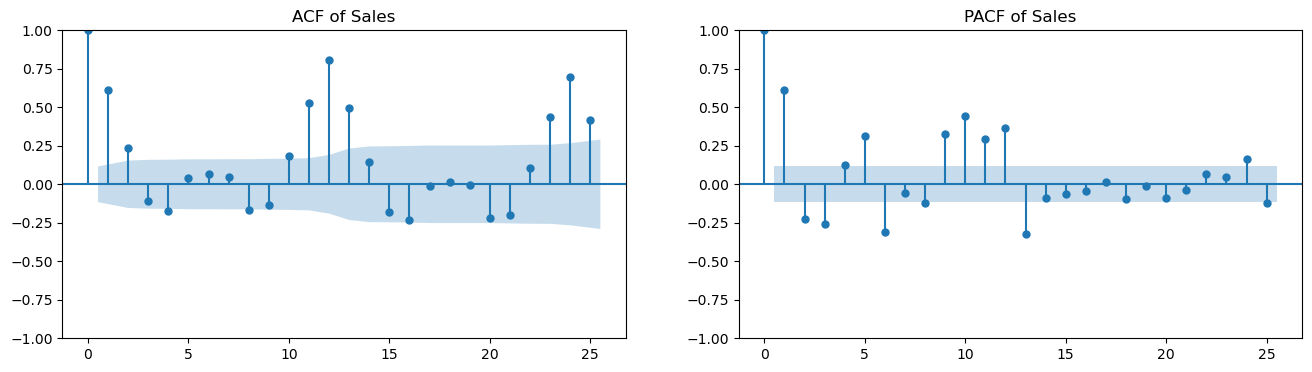

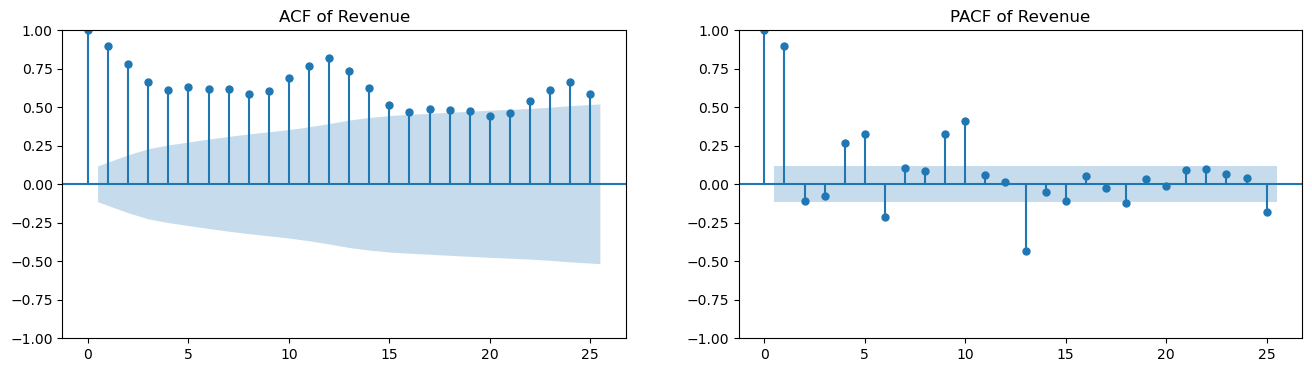

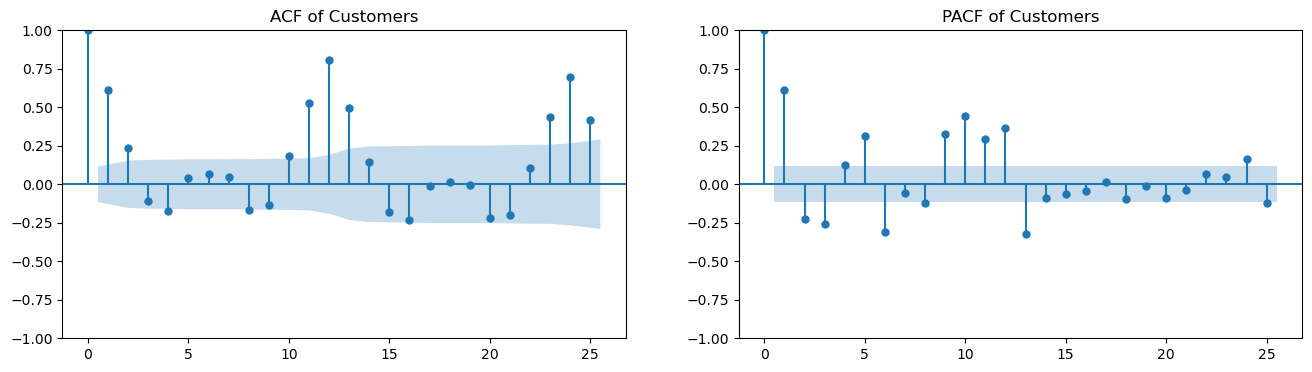

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot as plt

# Assuming electricity_df_agg_com is defined as in your previous code

# Plotting ACF and PACF for sales
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(electricity_df_agg_com['sales'], ax=axes[0])
plot_pacf(electricity_df_agg_com['sales'], ax=axes[1])
axes[0].set_title('ACF of Sales')
axes[1].set_title('PACF of Sales')
plt.show()

# Plotting ACF and PACF for revenue
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(electricity_df_agg_com['revenue'], ax=axes[0])
plot_pacf(electricity_df_agg_com['revenue'], ax=axes[1])
axes[0].set_title('ACF of Revenue')
axes[1].set_title('PACF of Revenue')
plt.show()

# Plotting ACF and PACF for customers
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(electricity_df_agg_com['customers'], ax=axes[0])
plot_pacf(electricity_df_agg_com['customers'], ax=axes[1])
axes[0].set_title('ACF of Customers')
axes[1].set_title('PACF of Customers')
plt.show()

Sales at 1, revenue at 1, customers at 12

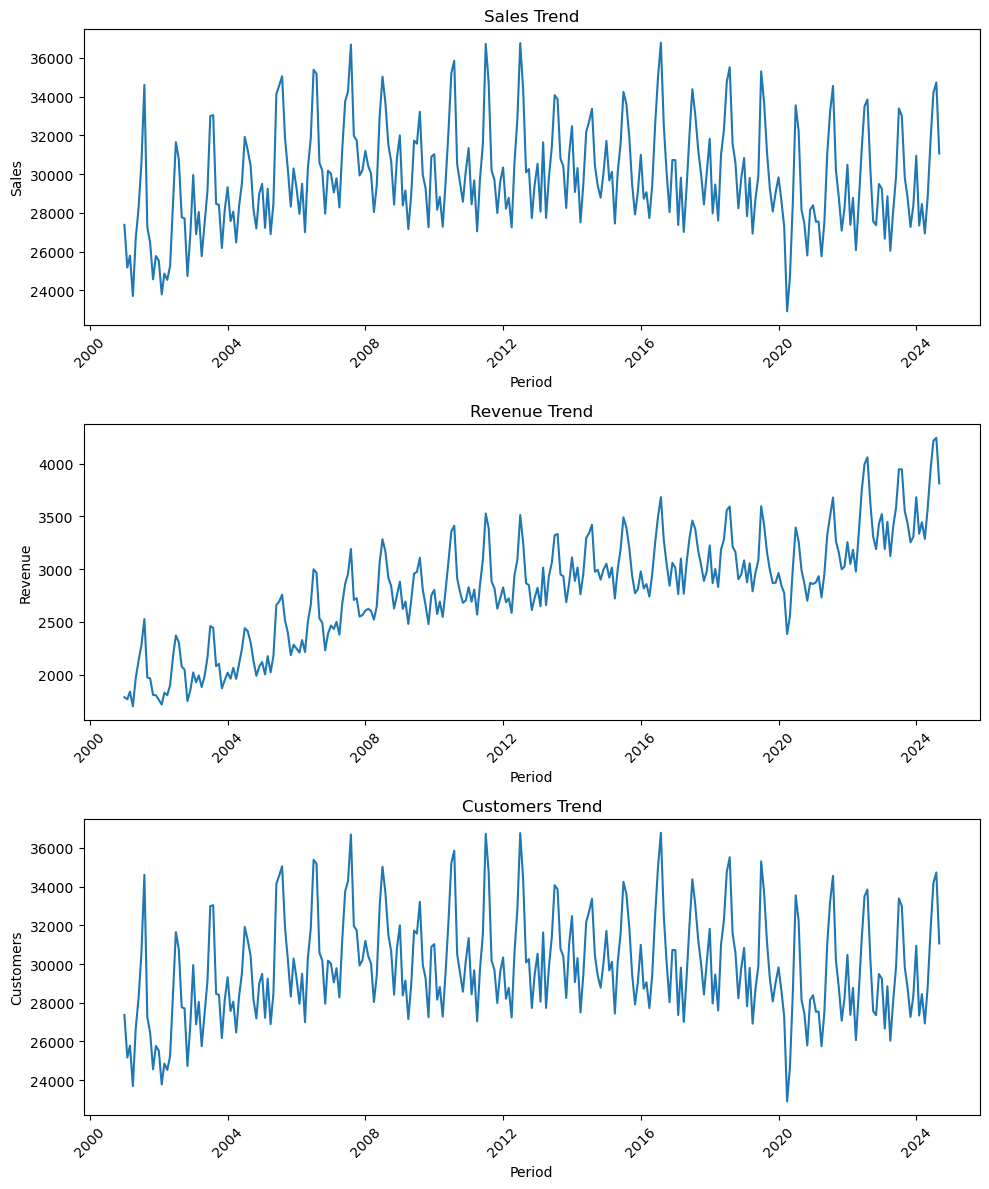

In [15]:
# Create the subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Plot Sales
axes[0].plot(electricity_df_agg_com['period'], electricity_df_agg_com['sales'])
axes[0].set_title('Sales Trend')
axes[0].set_xlabel('Period')
axes[0].set_ylabel('Sales')
axes[0].tick_params(axis='x', rotation=45)

# Plot Revenue
axes[1].plot(electricity_df_agg_com['period'], electricity_df_agg_com['revenue'])
axes[1].set_title('Revenue Trend')
axes[1].set_xlabel('Period')
axes[1].set_ylabel('Revenue')
axes[1].tick_params(axis='x', rotation=45)

# Plot Customers
axes[2].plot(electricity_df_agg_com['period'], electricity_df_agg_com['customers'])
axes[2].set_title('Customers Trend')
axes[2].set_xlabel('Period')
axes[2].set_ylabel('Customers')
axes[2].tick_params(axis='x', rotation=45)


# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [16]:
# Creating a function to check stationarity of series
def is_stationary(t_series, original_tseries, d=0):
    """
    Checks if a time series is stationary and if yes then return the differencing frequency reiterate using the Augmented Dickey-Fuller test.

    Args:
    series: A pandas Series representing the time series.

    Returns:
    The first differencing needed for stock where the series is stationary
    """
    result = adfuller(t_series)
    p_value = result[1]

    if p_value<0.05:
        return d
    else:
        return is_stationary(t_series.diff().dropna(),original_tseries,d+1)

In [17]:
def forecast_data(train, test, seriesName,s):
  train_data = train[['period',seriesName]]
  test_data = test[['period',seriesName]]

  d = is_stationary(train_data[seriesName], train_data[seriesName])
  print(f'd= {d}')

  accuracy_df = pd.DataFrame(columns=['Model','p','q','P','Q','Train_RMSE','Test_RMSE'])
  accuracy_df
  itr=1
  for p in range(5):
      for q in range(5):
          for P in range(5):
              for Q in range(5):
                  model = SARIMAX(train_data[seriesName], order=(p,d,q), seasonal_order=(P,d,Q,s))
                  model.initialize_approximate_diffuse()
                  model_fit = model.fit()
                  predictions = model_fit.predict(start=len(train_data[seriesName]), end=len(train_data[seriesName])+len(test_data[seriesName])-1)
                  train_predict = model_fit.predict(start=0, end=len(train_data[seriesName])-1)
                  rmse_tr = sqrt(mean_squared_error(train_data[seriesName], train_predict))
                  rmse_te = sqrt(mean_squared_error(test_data[seriesName], predictions))
                  rslts = pd.DataFrame({'Model':model_fit,'p':p,'q':q,'P':P,'Q':Q,'Train_RMSE':rmse_tr,'Test_RMSE':rmse_te},index=[0])
                  accuracy_df = pd.concat([accuracy_df,rslts],axis=0)
                  print(f'Iteration: {itr}')
                  itr=itr+1
  accuracy_df = accuracy_df.reset_index(drop=True)
  return accuracy_df


In [21]:
#Forecast LSTM function
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def calculate_mape(actual, predicted):
    """Calculates the Mean Absolute Percentage Error (MAPE)."""
    return np.mean(np.abs((actual - predicted) / actual)) * 100

def forecast_LSTM(df, sector,seriesName, epochs):
  df = df[df['sectorName']==sector]
  df1 = df[['period',seriesName]]
  df = df[seriesName]
  dataset = df.values
  dataset = dataset.astype('float32')
  dataset=dataset.reshape(-1,1)
  scaler = StandardScaler()
  dataset = scaler.fit_transform(dataset)
  train_size = int(len(dataset) * 0.7)
  test_size = len(dataset) - train_size
  train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
  look_back = 6
  df1_train, df1_test = df1[0:train_size-look_back-1], df1[train_size:(len(dataset)-look_back-1)]
  df = pd.concat([df1_train, df1_test])
  trainX, trainY = create_dataset(train, look_back)
  testX, testY = create_dataset(test, look_back)
  # Reshape input to be [samples, time steps, features]
  trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
  testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
  # Build the LSTM model
  model = Sequential()
  model.add(LSTM(4, input_shape=(1, look_back)))
  model.add(Dense(1))
  model.compile(loss='mape', optimizer='adam')
  model.fit(trainX, trainY, epochs=epochs, batch_size=1, verbose=2)
  # Make predictions
  trainPredict = model.predict(trainX)
  testPredict = model.predict(testX)
  # Invert predictions to original scale
  trainPredict = scaler.inverse_transform(trainPredict)
  trainY = scaler.inverse_transform([trainY])
  testPredict = scaler.inverse_transform(testPredict)
  testY = scaler.inverse_transform([testY])
  df2 = pd.concat([pd.DataFrame(trainPredict),pd.DataFrame(testPredict)])
  df2.index = df.index
  df = pd.merge(df, df2, left_index=True, right_index=True)
  df.columns = ['period','actual','predicted']
  # Calculate root mean squared error (RMSE)
  trainScore = np.sqrt(np.mean(np.square(trainPredict - trainY)))
  print('Train Score: %.4f RMSE' % (trainScore))
  trainScore = calculate_mape(trainY[0], trainPredict.flatten())
  print(f"Train MAPE: {trainScore:.2f}%")
  testScore = np.sqrt(np.mean(np.square(testPredict - testY)))
  print('Test Score: %.4f RMSE' % (testScore))
  testScore = calculate_mape(testY[0], testPredict.flatten())
  print(f"Test MAPE: {testScore:.2f}%")
  return model, df, scaler


In [22]:
#Predictor function
def predictor(complete_data, df, model, periods_to_predict, scaler):

  # Forecasting the next 12 months using the trained LSTM model

  # Prepare the input for forecasting
  look_back=6
  last_months = complete_data[-look_back:]
  future_predictions = []

  for _ in range(periods_to_predict):
      # Reshape the input
      x_input = np.reshape(last_months, (1, 1, look_back))

      # Make a prediction
      yhat = model.predict(x_input)

      # Append the prediction to the list
      future_predictions.append(yhat[0,0])

      # Update the input with the new prediction
      last_months = np.append(last_months[1:], yhat)

  # Inverse transform the predictions to original scale
  future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))


  # Generate future dates for the forecast
  last_date = electricity_df_agg.index[-1]
  future_dates = pd.date_range(start=electricity_df_agg.period.iloc[-1] + pd.DateOffset(months=1), periods=periods_to_predict, freq='MS')

  # Create a DataFrame for the forecast
  forecast_df = pd.DataFrame({'period': future_dates, 'predicted': future_predictions.flatten()})

  forecast_df['actual']=None

  # Print or visualize the forecast
  print(forecast_df)

  forecast_df = pd.concat([df,forecast_df])
  return forecast_df

In [45]:
#Test
sales_com_model, dataset, sc = forecast_LSTM(electricity_df_agg,'commercial','sales',5)

Epoch 1/5


C:\Users\krish\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


192/192 - 2s - 12ms/step - loss: 116.6535
Epoch 2/5
192/192 - 0s - 2ms/step - loss: 107.0379
Epoch 3/5
192/192 - 0s - 1ms/step - loss: 102.3084
Epoch 4/5
192/192 - 0s - 1ms/step - loss: 101.0017
Epoch 5/5
192/192 - 0s - 2ms/step - loss: 99.8193
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Train Score: 2599.3057 RMSE
Train MAPE: 6.63%
Test Score: 2645.0229 RMSE
Test MAPE: 7.40%


In [46]:
sales_com_model

<Sequential name=sequential_18, built=True>

In [42]:
dataset.head()

,period,actual,predicted
1,2001-01-01,27374.74900,30169.726562
6,2001-02-01,25176.39009,29883.425781
11,2001-03-01,25785.82429,30066.433594
16,2001-04-01,23702.71118,29948.351562
21,2001-05-01,26665.89346,28620.546875


In [47]:
sc

StandardScaler()

In [50]:
da = electricity_df_agg[electricity_df_agg['sectorName']=='commercial']
da = da[['period','sales']]
da.set_index('period',inplace=True)
da = da.values
da = da.astype('float32')
da = da.reshape(-1,1)
df_com_sales = predictor(da, dataset, sales_com_model, 24, sc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
       period     predicted actual
0  2024-10-01  28271.486328   None
1  2024-11-01  298

C:\Users\krish\AppData\Local\Temp\ipykernel_14008\109395740.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  forecast_df = pd.concat([df,forecast_df])


In [51]:
df_com_sales.head()

,period,actual,predicted
1,2001-01-01,27374.74900,29907.904297
6,2001-02-01,25176.39009,29575.798828
11,2001-03-01,25785.82429,30100.222656
16,2001-04-01,23702.71118,29900.138672
21,2001-05-01,26665.89346,29762.548828


In [26]:
df = electricity_df_agg[electricity_df_agg['sectorName']=='commercial']
df = df['sales']
df

1       27374.74900
6       25176.39009
11      25785.82429
16      23702.71118
21      26665.89346
           ...     
1401    28796.00272
1406    31773.17088
1411    34195.26467
1416    34728.46232
1421    31064.82051
Name: sales, Length: 285, dtype: float64

In [27]:
dataset = electricity_df_agg[electricity_df_agg['sectorName']=="commercial"]
dataset = dataset[['period','sales']]
dataset.iloc[0:len(dataset)-6-1,:].shape

(278, 2)

In [39]:
electricity_df_agg[electricity_df_agg['sectorName']=="commercial"]

,period,sectorName,sales,revenue,customers
1,2001-01-01,commercial,27374.74900,1786.30357,27371
6,2001-02-01,commercial,25176.39009,1767.67332,25174
11,2001-03-01,commercial,25785.82429,1838.89188,25782
16,2001-04-01,commercial,23702.71118,1700.27733,23700
21,2001-05-01,commercial,26665.89346,1965.27274,26662
...,...,...,...,...,...
1401,2024-05-01,commercial,28796.00272,3574.50852,28794
1406,2024-06-01,commercial,31773.17088,3945.69862,31771
1411,2024-07-01,commercial,34195.26467,4216.32188,34192
1416,2024-08-01,commercial,34728.46232,4245.20908,34726


In [28]:
dataset = electricity_df_agg[electricity_df_agg['sectorName']=="commercial"]
dataset = dataset[['period','sales']]
dataset = df.values
dataset = dataset.astype('float32')
dataset=dataset.reshape(-1,1)
scaler = StandardScaler()
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(train_size,test_size)

199 86


In [30]:
electricity_df_agg[electricity_df_agg['sectorName']=='residential']

,period,sectorName,sales,revenue,customers
4,2001-01-01,residential,36561.77278,2693.04420,36558
9,2001-02-01,residential,28140.05302,2185.62344,28136
14,2001-03-01,residential,27902.00268,2188.98789,27899
19,2001-04-01,residential,23209.95390,1895.84132,23206
24,2001-05-01,residential,22736.58324,1925.58498,22734
...,...,...,...,...,...
1403,2024-05-01,residential,27192.85493,4637.66159,27191
1408,2024-06-01,residential,35502.72431,5921.56805,35500
1413,2024-07-01,residential,40178.66992,6594.10933,40175
1418,2024-08-01,residential,39205.54285,6472.72536,39202


In [31]:
# com
sales_com_model, df, sc = forecast_LSTM(electricity_df_agg,'commercial','sales',500)
revenue_com_model, df1, sc1 = forecast_LSTM(electricity_df_agg,'commercial','revenue',500)
customers_com_model, df2, sc2 = forecast_LSTM(electricity_df_agg,'commercial','customers',500)
# res
sales_res_model, df3, sc3 = forecast_LSTM(electricity_df_agg,'residential','sales',500)
revenue_res_model, df4, sc4 = forecast_LSTM(electricity_df_agg,'residential','revenue',500)
customers_res_model, df5, sc5 = forecast_LSTM(electricity_df_agg,'residential','customers',500)
# ind
sales_ind_model, df6, sc6 = forecast_LSTM(electricity_df_agg,'industrial','sales',500)
revenue_ind_model, df7, sc7 = forecast_LSTM(electricity_df_agg,'industrial','revenue',500)
customers_ind_model, df8, sc8 = forecast_LSTM(electricity_df_agg,'industrial','customers',500)
# trns
sales_trns_model, df9, sc9 = forecast_LSTM(electricity_df_agg,'transportation','sales',500)
revenue_trns_model, df10, sc10 = forecast_LSTM(electricity_df_agg,'transportation','revenue',500)
customers_trns_model, df11, sc11 = forecast_LSTM(electricity_df_agg,'transportation','customers',500)
# othr
sales_othr_model, df12, sc12 = forecast_LSTM(electricity_df_agg,'other','sales',500)
revenue_othr_model, df13, sc13 = forecast_LSTM(electricity_df_agg,'other','revenue',500)
customers_othr_model, df14, sc14 = forecast_LSTM(electricity_df_agg,'other','customers',500)


Epoch 1/500


C:\Users\krish\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


192/192 - 2s - 13ms/step - loss: 140.8348
Epoch 2/500
192/192 - 0s - 2ms/step - loss: 119.5570
Epoch 3/500
192/192 - 0s - 2ms/step - loss: 110.2122
Epoch 4/500
192/192 - 0s - 2ms/step - loss: 105.0851
Epoch 5/500
192/192 - 0s - 2ms/step - loss: 100.6386
Epoch 6/500
192/192 - 0s - 2ms/step - loss: 98.0067
Epoch 7/500
192/192 - 0s - 2ms/step - loss: 95.1663
Epoch 8/500
192/192 - 0s - 2ms/step - loss: 93.9086
Epoch 9/500
192/192 - 0s - 2ms/step - loss: 92.4117
Epoch 10/500
192/192 - 0s - 2ms/step - loss: 94.2876
Epoch 11/500
192/192 - 0s - 2ms/step - loss: 92.4071
Epoch 12/500
192/192 - 0s - 2ms/step - loss: 92.4564
Epoch 13/500
192/192 - 0s - 2ms/step - loss: 91.9938
Epoch 14/500
192/192 - 0s - 2ms/step - loss: 92.5350
Epoch 15/500
192/192 - 0s - 2ms/step - loss: 91.4150
Epoch 16/500
192/192 - 0s - 2ms/step - loss: 91.9044
Epoch 17/500
192/192 - 0s - 2ms/step - loss: 91.1724
Epoch 18/500
192/192 - 0s - 2ms/step - loss: 91.4722
Epoch 19/500
192/192 - 0s - 2ms/step - loss: 90.9924
Epoch 20

C:\Users\krish\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


192/192 - 2s - 11ms/step - loss: 248.2175
Epoch 2/500
192/192 - 0s - 2ms/step - loss: 210.0708
Epoch 3/500
192/192 - 0s - 2ms/step - loss: 177.4876
Epoch 4/500
192/192 - 0s - 2ms/step - loss: 149.6521
Epoch 5/500
192/192 - 0s - 2ms/step - loss: 124.2236
Epoch 6/500
192/192 - 0s - 2ms/step - loss: 115.4123
Epoch 7/500
192/192 - 0s - 2ms/step - loss: 122.0245
Epoch 8/500
192/192 - 0s - 1ms/step - loss: 106.6313
Epoch 9/500
192/192 - 0s - 2ms/step - loss: 103.3459
Epoch 10/500
192/192 - 0s - 2ms/step - loss: 106.6048
Epoch 11/500
192/192 - 0s - 2ms/step - loss: 94.7671
Epoch 12/500
192/192 - 0s - 2ms/step - loss: 106.1192
Epoch 13/500
192/192 - 0s - 2ms/step - loss: 92.1402
Epoch 14/500
192/192 - 0s - 2ms/step - loss: 102.9606
Epoch 15/500
192/192 - 0s - 2ms/step - loss: 100.3487
Epoch 16/500
192/192 - 0s - 1ms/step - loss: 91.5010
Epoch 17/500
192/192 - 0s - 1ms/step - loss: 104.6803
Epoch 18/500
192/192 - 0s - 1ms/step - loss: 91.8686
Epoch 19/500
192/192 - 0s - 1ms/step - loss: 102.201

C:\Users\krish\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


192/192 - 4s - 19ms/step - loss: 113.7652
Epoch 2/500
192/192 - 1s - 3ms/step - loss: 108.6337
Epoch 3/500
192/192 - 1s - 3ms/step - loss: 107.8605
Epoch 4/500
192/192 - 1s - 3ms/step - loss: 106.1420
Epoch 5/500
192/192 - 1s - 3ms/step - loss: 104.4809
Epoch 6/500
192/192 - 1s - 3ms/step - loss: 103.1219
Epoch 7/500
192/192 - 1s - 3ms/step - loss: 101.6251
Epoch 8/500
192/192 - 1s - 3ms/step - loss: 100.0462
Epoch 9/500
192/192 - 1s - 3ms/step - loss: 98.6471
Epoch 10/500
192/192 - 1s - 3ms/step - loss: 97.1319
Epoch 11/500
192/192 - 1s - 3ms/step - loss: 96.3603
Epoch 12/500
192/192 - 1s - 3ms/step - loss: 94.7003
Epoch 13/500
192/192 - 1s - 3ms/step - loss: 93.6044
Epoch 14/500
192/192 - 1s - 3ms/step - loss: 93.2511
Epoch 15/500
192/192 - 1s - 3ms/step - loss: 93.3799
Epoch 16/500
192/192 - 1s - 4ms/step - loss: 91.7429
Epoch 17/500
192/192 - 1s - 3ms/step - loss: 92.9693
Epoch 18/500
192/192 - 1s - 3ms/step - loss: 91.9607
Epoch 19/500
192/192 - 1s - 3ms/step - loss: 91.5421
Epoch

C:\Users\krish\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


192/192 - 3s - 17ms/step - loss: 103.3561
Epoch 2/500
192/192 - 1s - 4ms/step - loss: 97.9949
Epoch 3/500
192/192 - 1s - 3ms/step - loss: 94.4378
Epoch 4/500
192/192 - 1s - 3ms/step - loss: 93.1134
Epoch 5/500
192/192 - 1s - 3ms/step - loss: 91.7990
Epoch 6/500
192/192 - 0s - 3ms/step - loss: 90.5659
Epoch 7/500
192/192 - 1s - 3ms/step - loss: 88.6093
Epoch 8/500
192/192 - 1s - 4ms/step - loss: 85.7299
Epoch 9/500
192/192 - 1s - 3ms/step - loss: 85.2400
Epoch 10/500
192/192 - 1s - 3ms/step - loss: 83.4098
Epoch 11/500
192/192 - 1s - 3ms/step - loss: 82.4534
Epoch 12/500
192/192 - 1s - 3ms/step - loss: 80.4374
Epoch 13/500
192/192 - 0s - 3ms/step - loss: 80.7979
Epoch 14/500
192/192 - 1s - 3ms/step - loss: 79.7509
Epoch 15/500
192/192 - 1s - 3ms/step - loss: 79.3933
Epoch 16/500
192/192 - 0s - 3ms/step - loss: 78.7453
Epoch 17/500
192/192 - 1s - 3ms/step - loss: 77.3156
Epoch 18/500
192/192 - 1s - 3ms/step - loss: 78.2518
Epoch 19/500
192/192 - 1s - 3ms/step - loss: 77.1072
Epoch 20/500

C:\Users\krish\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


192/192 - 3s - 17ms/step - loss: 102.5339
Epoch 2/500
192/192 - 1s - 3ms/step - loss: 99.4609
Epoch 3/500
192/192 - 1s - 3ms/step - loss: 97.4397
Epoch 4/500
192/192 - 1s - 3ms/step - loss: 95.2051
Epoch 5/500
192/192 - 1s - 3ms/step - loss: 93.6667
Epoch 6/500
192/192 - 1s - 3ms/step - loss: 91.7411
Epoch 7/500
192/192 - 1s - 3ms/step - loss: 90.2012
Epoch 8/500
192/192 - 1s - 4ms/step - loss: 88.4066
Epoch 9/500
192/192 - 1s - 3ms/step - loss: 87.5021
Epoch 10/500
192/192 - 1s - 3ms/step - loss: 86.0083
Epoch 11/500
192/192 - 1s - 3ms/step - loss: 84.7358
Epoch 12/500
192/192 - 1s - 3ms/step - loss: 83.9930
Epoch 13/500
192/192 - 1s - 3ms/step - loss: 82.6136
Epoch 14/500
192/192 - 1s - 4ms/step - loss: 81.4032
Epoch 15/500
192/192 - 1s - 3ms/step - loss: 80.7094
Epoch 16/500
192/192 - 1s - 4ms/step - loss: 79.5299
Epoch 17/500
192/192 - 1s - 7ms/step - loss: 77.8335
Epoch 18/500
192/192 - 1s - 6ms/step - loss: 77.9459
Epoch 19/500
192/192 - 1s - 3ms/step - loss: 76.1617
Epoch 20/500

C:\Users\krish\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


192/192 - 4s - 21ms/step - loss: 96.4072
Epoch 2/500
192/192 - 1s - 3ms/step - loss: 94.7063
Epoch 3/500
192/192 - 1s - 3ms/step - loss: 92.8517
Epoch 4/500
192/192 - 1s - 3ms/step - loss: 91.7296
Epoch 5/500
192/192 - 1s - 3ms/step - loss: 90.1490
Epoch 6/500
192/192 - 1s - 3ms/step - loss: 88.3943
Epoch 7/500
192/192 - 1s - 3ms/step - loss: 87.2602
Epoch 8/500
192/192 - 1s - 3ms/step - loss: 85.6286
Epoch 9/500
192/192 - 1s - 4ms/step - loss: 83.8148
Epoch 10/500
192/192 - 1s - 3ms/step - loss: 81.8552
Epoch 11/500
192/192 - 1s - 3ms/step - loss: 81.0367
Epoch 12/500
192/192 - 0s - 3ms/step - loss: 79.3120
Epoch 13/500
192/192 - 1s - 3ms/step - loss: 78.7339
Epoch 14/500
192/192 - 1s - 3ms/step - loss: 78.2056
Epoch 15/500
192/192 - 0s - 3ms/step - loss: 76.7668
Epoch 16/500
192/192 - 1s - 4ms/step - loss: 76.6638
Epoch 17/500
192/192 - 1s - 4ms/step - loss: 76.4030
Epoch 18/500
192/192 - 1s - 3ms/step - loss: 75.1242
Epoch 19/500
192/192 - 1s - 3ms/step - loss: 74.9976
Epoch 20/500


C:\Users\krish\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


192/192 - 3s - 17ms/step - loss: 124.5462
Epoch 2/500
192/192 - 1s - 3ms/step - loss: 116.7020
Epoch 3/500
192/192 - 1s - 3ms/step - loss: 109.6080
Epoch 4/500
192/192 - 1s - 3ms/step - loss: 102.9690
Epoch 5/500
192/192 - 1s - 3ms/step - loss: 97.5952
Epoch 6/500
192/192 - 1s - 4ms/step - loss: 103.1647
Epoch 7/500
192/192 - 1s - 3ms/step - loss: 96.5815
Epoch 8/500
192/192 - 1s - 5ms/step - loss: 99.6540
Epoch 9/500
192/192 - 1s - 3ms/step - loss: 97.1876
Epoch 10/500
192/192 - 1s - 3ms/step - loss: 94.3375
Epoch 11/500
192/192 - 1s - 3ms/step - loss: 96.9190
Epoch 12/500
192/192 - 1s - 4ms/step - loss: 89.8615
Epoch 13/500
192/192 - 1s - 4ms/step - loss: 97.5625
Epoch 14/500
192/192 - 1s - 3ms/step - loss: 89.3324
Epoch 15/500
192/192 - 1s - 3ms/step - loss: 95.2740
Epoch 16/500
192/192 - 1s - 3ms/step - loss: 88.9903
Epoch 17/500
192/192 - 1s - 3ms/step - loss: 94.1013
Epoch 18/500
192/192 - 1s - 3ms/step - loss: 88.2184
Epoch 19/500
192/192 - 1s - 3ms/step - loss: 91.9876
Epoch 20

C:\Users\krish\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


192/192 - 3s - 17ms/step - loss: 102.8126
Epoch 2/500
192/192 - 1s - 3ms/step - loss: 100.2120
Epoch 3/500
192/192 - 1s - 3ms/step - loss: 98.6248
Epoch 4/500
192/192 - 1s - 3ms/step - loss: 97.5338
Epoch 5/500
192/192 - 1s - 3ms/step - loss: 97.4952
Epoch 6/500
192/192 - 1s - 3ms/step - loss: 96.1783
Epoch 7/500
192/192 - 1s - 3ms/step - loss: 94.3667
Epoch 8/500
192/192 - 1s - 4ms/step - loss: 94.1124
Epoch 9/500
192/192 - 1s - 3ms/step - loss: 90.0543
Epoch 10/500
192/192 - 1s - 3ms/step - loss: 90.8174
Epoch 11/500
192/192 - 1s - 3ms/step - loss: 85.1918
Epoch 12/500
192/192 - 1s - 3ms/step - loss: 84.9162
Epoch 13/500
192/192 - 1s - 4ms/step - loss: 81.5870
Epoch 14/500
192/192 - 1s - 3ms/step - loss: 79.0051
Epoch 15/500
192/192 - 1s - 3ms/step - loss: 79.1324
Epoch 16/500
192/192 - 1s - 3ms/step - loss: 75.0030
Epoch 17/500
192/192 - 1s - 3ms/step - loss: 75.0460
Epoch 18/500
192/192 - 1s - 4ms/step - loss: 72.8859
Epoch 19/500
192/192 - 1s - 3ms/step - loss: 70.4265
Epoch 20/50

C:\Users\krish\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


192/192 - 2s - 11ms/step - loss: 104.9598
Epoch 2/500
192/192 - 0s - 2ms/step - loss: 95.0360
Epoch 3/500
192/192 - 0s - 2ms/step - loss: 95.6951
Epoch 4/500
192/192 - 0s - 2ms/step - loss: 95.2072
Epoch 5/500
192/192 - 1s - 4ms/step - loss: 93.3855
Epoch 6/500
192/192 - 0s - 2ms/step - loss: 95.1346
Epoch 7/500
192/192 - 0s - 2ms/step - loss: 92.9892
Epoch 8/500
192/192 - 0s - 2ms/step - loss: 93.7113
Epoch 9/500
192/192 - 0s - 2ms/step - loss: 93.8559
Epoch 10/500
192/192 - 0s - 2ms/step - loss: 94.0679
Epoch 11/500
192/192 - 1s - 3ms/step - loss: 91.3642
Epoch 12/500
192/192 - 0s - 2ms/step - loss: 93.4329
Epoch 13/500
192/192 - 0s - 2ms/step - loss: 90.8566
Epoch 14/500
192/192 - 0s - 2ms/step - loss: 92.9980
Epoch 15/500
192/192 - 0s - 2ms/step - loss: 91.9479
Epoch 16/500
192/192 - 1s - 4ms/step - loss: 91.5973
Epoch 17/500
192/192 - 1s - 4ms/step - loss: 90.1986
Epoch 18/500
192/192 - 0s - 2ms/step - loss: 90.8307
Epoch 19/500
192/192 - 1s - 4ms/step - loss: 91.2710
Epoch 20/500

C:\Users\krish\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


175/175 - 2s - 13ms/step - loss: 138.9058
Epoch 2/500
175/175 - 0s - 2ms/step - loss: 131.0849
Epoch 3/500
175/175 - 0s - 2ms/step - loss: 124.1392
Epoch 4/500
175/175 - 0s - 2ms/step - loss: 118.8932
Epoch 5/500
175/175 - 0s - 2ms/step - loss: 114.7256
Epoch 6/500
175/175 - 0s - 2ms/step - loss: 110.9529
Epoch 7/500
175/175 - 0s - 2ms/step - loss: 107.1745
Epoch 8/500
175/175 - 0s - 2ms/step - loss: 104.7847
Epoch 9/500
175/175 - 0s - 2ms/step - loss: 102.0018
Epoch 10/500
175/175 - 0s - 2ms/step - loss: 100.7535
Epoch 11/500
175/175 - 0s - 2ms/step - loss: 98.9864
Epoch 12/500
175/175 - 0s - 2ms/step - loss: 97.2375
Epoch 13/500
175/175 - 0s - 2ms/step - loss: 95.7002
Epoch 14/500
175/175 - 0s - 2ms/step - loss: 94.6270
Epoch 15/500
175/175 - 0s - 2ms/step - loss: 93.1752
Epoch 16/500
175/175 - 0s - 2ms/step - loss: 92.3518
Epoch 17/500
175/175 - 0s - 2ms/step - loss: 93.2372
Epoch 18/500
175/175 - 0s - 2ms/step - loss: 91.4793
Epoch 19/500
175/175 - 0s - 2ms/step - loss: 91.2803
Epo

C:\Users\krish\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


175/175 - 2s - 14ms/step - loss: 218.0197
Epoch 2/500
175/175 - 0s - 2ms/step - loss: 199.1107
Epoch 3/500
175/175 - 0s - 2ms/step - loss: 185.2777
Epoch 4/500
175/175 - 0s - 2ms/step - loss: 170.6893
Epoch 5/500
175/175 - 0s - 2ms/step - loss: 158.3346
Epoch 6/500
175/175 - 0s - 2ms/step - loss: 149.6013
Epoch 7/500
175/175 - 0s - 2ms/step - loss: 140.9143
Epoch 8/500
175/175 - 0s - 2ms/step - loss: 132.6550
Epoch 9/500
175/175 - 0s - 1ms/step - loss: 122.6677
Epoch 10/500
175/175 - 0s - 1ms/step - loss: 127.2100
Epoch 11/500
175/175 - 0s - 1ms/step - loss: 118.9989
Epoch 12/500
175/175 - 0s - 1ms/step - loss: 111.2751
Epoch 13/500
175/175 - 0s - 1ms/step - loss: 115.7415
Epoch 14/500
175/175 - 0s - 1ms/step - loss: 106.9551
Epoch 15/500
175/175 - 0s - 1ms/step - loss: 110.6466
Epoch 16/500
175/175 - 0s - 1ms/step - loss: 107.3544
Epoch 17/500
175/175 - 0s - 1ms/step - loss: 108.7684
Epoch 18/500
175/175 - 0s - 1ms/step - loss: 103.7678
Epoch 19/500
175/175 - 0s - 1ms/step - loss: 108

C:\Users\krish\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


175/175 - 3s - 15ms/step - loss: 134.1583
Epoch 2/500
175/175 - 0s - 2ms/step - loss: 128.1912
Epoch 3/500
175/175 - 0s - 2ms/step - loss: 121.9830
Epoch 4/500
175/175 - 0s - 2ms/step - loss: 116.5894
Epoch 5/500
175/175 - 0s - 2ms/step - loss: 112.3585
Epoch 6/500
175/175 - 0s - 2ms/step - loss: 108.5652
Epoch 7/500
175/175 - 0s - 2ms/step - loss: 104.8812
Epoch 8/500
175/175 - 0s - 2ms/step - loss: 101.8315
Epoch 9/500
175/175 - 0s - 2ms/step - loss: 99.6309
Epoch 10/500
175/175 - 0s - 2ms/step - loss: 96.9270
Epoch 11/500
175/175 - 0s - 2ms/step - loss: 97.0808
Epoch 12/500
175/175 - 0s - 2ms/step - loss: 95.4358
Epoch 13/500
175/175 - 0s - 2ms/step - loss: 95.3091
Epoch 14/500
175/175 - 0s - 2ms/step - loss: 94.7021
Epoch 15/500
175/175 - 0s - 2ms/step - loss: 94.9223
Epoch 16/500
175/175 - 0s - 2ms/step - loss: 94.0884
Epoch 17/500
175/175 - 0s - 2ms/step - loss: 93.8491
Epoch 18/500
175/175 - 0s - 2ms/step - loss: 93.6242
Epoch 19/500
175/175 - 0s - 2ms/step - loss: 92.8522
Epoch

C:\Users\krish\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 - 2s - 237ms/step - loss: 78.1558
Epoch 2/500
9/9 - 0s - 8ms/step - loss: 73.4168
Epoch 3/500
9/9 - 0s - 7ms/step - loss: 70.6938
Epoch 4/500
9/9 - 0s - 9ms/step - loss: 67.0559
Epoch 5/500
9/9 - 0s - 9ms/step - loss: 65.0598
Epoch 6/500
9/9 - 0s - 7ms/step - loss: 64.1391
Epoch 7/500
9/9 - 0s - 8ms/step - loss: 63.2834
Epoch 8/500
9/9 - 0s - 8ms/step - loss: 63.2971
Epoch 9/500
9/9 - 0s - 8ms/step - loss: 63.6445
Epoch 10/500
9/9 - 0s - 9ms/step - loss: 63.8877
Epoch 11/500
9/9 - 0s - 8ms/step - loss: 62.4672
Epoch 12/500
9/9 - 0s - 8ms/step - loss: 62.8559
Epoch 13/500
9/9 - 0s - 7ms/step - loss: 62.4170
Epoch 14/500
9/9 - 0s - 8ms/step - loss: 61.9165
Epoch 15/500
9/9 - 0s - 7ms/step - loss: 61.9741
Epoch 16/500
9/9 - 0s - 8ms/step - loss: 61.3546
Epoch 17/500
9/9 - 0s - 9ms/step - loss: 60.3003
Epoch 18/500
9/9 - 0s - 8ms/step - loss: 60.5294
Epoch 19/500
9/9 - 0s - 8ms/step - loss: 59.4682
Epoch 20/500
9/9 - 0s - 7ms/step - loss: 60.6947
Epoch 21/500
9/9 - 0s - 8ms/step - loss

C:\Users\krish\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 - 3s - 354ms/step - loss: 103.6190
Epoch 2/500
9/9 - 0s - 9ms/step - loss: 100.2825
Epoch 3/500
9/9 - 0s - 9ms/step - loss: 98.3193
Epoch 4/500
9/9 - 0s - 9ms/step - loss: 95.3291
Epoch 5/500
9/9 - 0s - 9ms/step - loss: 92.0805
Epoch 6/500
9/9 - 0s - 9ms/step - loss: 90.7560
Epoch 7/500
9/9 - 0s - 9ms/step - loss: 90.3301
Epoch 8/500
9/9 - 0s - 10ms/step - loss: 89.9620
Epoch 9/500
9/9 - 0s - 9ms/step - loss: 88.8729
Epoch 10/500
9/9 - 0s - 9ms/step - loss: 88.5142
Epoch 11/500
9/9 - 0s - 9ms/step - loss: 87.4178
Epoch 12/500
9/9 - 0s - 9ms/step - loss: 88.5622
Epoch 13/500
9/9 - 0s - 9ms/step - loss: 87.4893
Epoch 14/500
9/9 - 0s - 9ms/step - loss: 85.8455
Epoch 15/500
9/9 - 0s - 9ms/step - loss: 85.4424
Epoch 16/500
9/9 - 0s - 8ms/step - loss: 83.9471
Epoch 17/500
9/9 - 0s - 8ms/step - loss: 83.7201
Epoch 18/500
9/9 - 0s - 9ms/step - loss: 82.6190
Epoch 19/500
9/9 - 0s - 8ms/step - loss: 81.5300
Epoch 20/500
9/9 - 0s - 8ms/step - loss: 80.4782
Epoch 21/500
9/9 - 0s - 8ms/step - l

C:\Users\krish\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 - 2s - 265ms/step - loss: 106.9204
Epoch 2/500
9/9 - 0s - 9ms/step - loss: 103.3973
Epoch 3/500
9/9 - 0s - 9ms/step - loss: 100.0681
Epoch 4/500
9/9 - 0s - 9ms/step - loss: 96.6741
Epoch 5/500
9/9 - 0s - 9ms/step - loss: 93.1973
Epoch 6/500
9/9 - 0s - 10ms/step - loss: 89.6594
Epoch 7/500
9/9 - 0s - 10ms/step - loss: 86.8767
Epoch 8/500
9/9 - 0s - 9ms/step - loss: 84.2846
Epoch 9/500
9/9 - 0s - 9ms/step - loss: 82.8521
Epoch 10/500
9/9 - 0s - 9ms/step - loss: 80.5023
Epoch 11/500
9/9 - 0s - 9ms/step - loss: 77.6872
Epoch 12/500
9/9 - 0s - 9ms/step - loss: 75.6547
Epoch 13/500
9/9 - 0s - 9ms/step - loss: 73.1058
Epoch 14/500
9/9 - 0s - 8ms/step - loss: 71.5023
Epoch 15/500
9/9 - 0s - 8ms/step - loss: 68.7146
Epoch 16/500
9/9 - 0s - 8ms/step - loss: 67.0619
Epoch 17/500
9/9 - 0s - 8ms/step - loss: 64.8910
Epoch 18/500
9/9 - 0s - 9ms/step - loss: 65.1189
Epoch 19/500
9/9 - 0s - 9ms/step - loss: 65.4699
Epoch 20/500
9/9 - 0s - 9ms/step - loss: 64.3177
Epoch 21/500
9/9 - 0s - 9ms/step -

#### Commercial

In [52]:
#Commercial
da = electricity_df_agg[electricity_df_agg['sectorName']=='commercial']
da = da[['period','sales']]
da.set_index('period',inplace=True)
da = da.values
da = da.astype('float32')
da = da.reshape(-1,1)
df_com_sales = predictor(da, df, sales_com_model, 24, sc)

da = electricity_df_agg[electricity_df_agg['sectorName']=='commercial']
da = da[['period','revenue']]
da.set_index('period',inplace=True)
da = da.values
da = da.astype('float32')
da = da.reshape(-1,1)
df_com_revenue = predictor(da, df1, revenue_com_model, 24, sc1)

da = electricity_df_agg[electricity_df_agg['sectorName']=='commercial']
da = da[['period','customers']]
da.set_index('period',inplace=True)
da = da.values
da = da.astype('float32')
da = da.reshape(-1,1)
df_com_cust = predictor(da, df2, customers_com_model, 24, sc2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
       period     predicted actual
0  2024-10-01  28271.486328   None
1  2024-11-01  298

C:\Users\krish\AppData\Local\Temp\ipykernel_14008\109395740.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  forecast_df = pd.concat([df,forecast_df])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
       period    predicted actual
0  2024-10-01  2918.329834   None
1  2024-11-01  2918.330078   None
2  2024-12-01  2918.3300

C:\Users\krish\AppData\Local\Temp\ipykernel_14008\109395740.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  forecast_df = pd.concat([df,forecast_df])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
       period     predicted actual
0  2024-10-01  29647.640625   None
1  2024-11-01  29647.640625   None
2  2024-12-01  29647.

In [55]:
df_com_sales['sector'] = 'Commercial'
df_com_sales['feild'] = 'Sales'

df_com_revenue['sector'] = 'Commercial'
df_com_revenue['feild'] = 'Revenue'

df_com_cust['sector'] = 'Commercial'
df_com_cust['feild'] = 'Customer'

In [74]:
#Dataframe commercial
df_com = pd.concat([df_com_sales, df_com_revenue, df_com_cust], ignore_index=False)
df_com.head()

,period,actual,predicted,sector,feild
1,2001-01-01,27374.749,30631.796875,Commercial,Sales
6,2001-02-01,25176.39009,29761.509766,Commercial,Sales
11,2001-03-01,25785.82429,29226.054688,Commercial,Sales
16,2001-04-01,23702.71118,28270.554688,Commercial,Sales
21,2001-05-01,26665.89346,23649.119141,Commercial,Sales


#### Residential

In [75]:
#Residential
da = electricity_df_agg[electricity_df_agg['sectorName']=='residential']
da = da[['period','sales']]
da.set_index('period',inplace=True)
da = da.values
da = da.astype('float32')
da = da.reshape(-1,1)
df_res_sales = predictor(da, df3, sales_res_model, 24, sc3)

da = electricity_df_agg[electricity_df_agg['sectorName']=='residential']
da = da[['period','revenue']]
da.set_index('period',inplace=True)
da = da.values
da = da.astype('float32')
da = da.reshape(-1,1)
df_res_revenue = predictor(da, df4, revenue_res_model, 24, sc4)

da = electricity_df_agg[electricity_df_agg['sectorName']=='residential']
da = da[['period','customers']]
da.set_index('period',inplace=True)
da = da.values
da = da.astype('float32')
da = da.reshape(-1,1)
df_res_cust = predictor(da, df5, customers_res_model, 24, sc5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
       period     predicted actual
0  2024-10-01  30165.492188   None
1  2024-11-01  382

C:\Users\krish\AppData\Local\Temp\ipykernel_14008\109395740.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  forecast_df = pd.concat([df,forecast_df])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
       period    predicted actual
0  2024-10-01  3601.822998   None
1  2024-11-01  2487.438965   None
2  2024-12-01  4716.207520   None
3  2025-01-01  2487.438965  

C:\Users\krish\AppData\Local\Temp\ipykernel_14008\109395740.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  forecast_df = pd.concat([df,forecast_df])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
       period     predicted actual
0  2024-10-01  33009.113281   None
1  2024-11-01  26986.447266   None
2  2024-12-01  26986.

In [76]:
df_res_sales['sector'] = 'Residential'
df_res_sales['feild'] = 'Sales'

df_res_revenue['sector'] = 'Residential'
df_res_revenue['feild'] = 'Revenue'

df_res_cust['sector'] = 'Residential'
df_res_cust['feild'] = 'Customer'

In [77]:
#Dataframe residential
df_res = pd.concat([df_res_sales, df_res_revenue, df_res_cust], ignore_index=False)
df_res.head()

,period,actual,predicted,sector,feild
4,2001-01-01,36561.77278,34452.109375,Residential,Sales
9,2001-02-01,28140.05302,38130.125000,Residential,Sales
14,2001-03-01,27902.00268,29318.705078,Residential,Sales
19,2001-04-01,23209.9539,24179.343750,Residential,Sales
24,2001-05-01,22736.58324,27579.380859,Residential,Sales


#### Industrial

In [78]:
#Industrial
da = electricity_df_agg[electricity_df_agg['sectorName']=='industrial']
da = da[['period','sales']]
da.set_index('period',inplace=True)
da = da.values
da = da.astype('float32')
da = da.reshape(-1,1)
df_ind_sales = predictor(da, df6, sales_ind_model, 24, sc6)

da = electricity_df_agg[electricity_df_agg['sectorName']=='industrial']
da = da[['period','revenue']]
da.set_index('period',inplace=True)
da = da.values
da = da.astype('float32')
da = da.reshape(-1,1)
df_ind_revenue = predictor(da, df7, revenue_ind_model, 24, sc7)

da = electricity_df_agg[electricity_df_agg['sectorName']=='industrial']
da = da[['period','customers']]
da.set_index('period',inplace=True)
da = da.values
da = da.astype('float32')
da = da.reshape(-1,1)
df_ind_cust = predictor(da, df8, customers_ind_model, 24, sc8)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
       period     predicted actual
0  2024-10-01  37197.042969   None
1  2024-11-01  347

C:\Users\krish\AppData\Local\Temp\ipykernel_14008\109395740.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  forecast_df = pd.concat([df,forecast_df])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
       period    predicted actual
0  2024-10-01  2212.405273   None
1  2024-11-01  2212.405273   None
2  2024-12-01  2212.4052

C:\Users\krish\AppData\Local\Temp\ipykernel_14008\109395740.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  forecast_df = pd.concat([df,forecast_df])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
       period     predicted actual
0  2024-10-01  37390.757812   None
1  2024-11-01  32458.785156   None
2  2024-12-01  34151.714844   None
3  2025-01-01  34151.714

In [79]:
df_ind_sales['sector'] = 'Industrial'
df_ind_sales['feild'] = 'Sales'

df_ind_revenue['sector'] = 'Industrial'
df_ind_revenue['feild'] = 'Revenue'

df_ind_cust['sector'] = 'Industrial'
df_ind_cust['feild'] = 'Customer'

In [80]:
#Dataframe industrial
df_ind = pd.concat([df_ind_sales, df_ind_revenue, df_ind_cust], ignore_index=False)
df_ind.head()

,period,actual,predicted,sector,feild
2,2001-01-01,34580.77856,35215.375000,Industrial,Sales
7,2001-02-01,36146.94226,35364.906250,Industrial,Sales
12,2001-03-01,35379.85538,33666.847656,Industrial,Sales
17,2001-04-01,33935.54432,32508.609375,Industrial,Sales
22,2001-05-01,35610.98234,33307.226562,Industrial,Sales


#### Transportation

In [81]:
#transportation
da = electricity_df_agg[electricity_df_agg['sectorName']=='transportation']
da = da[['period','sales']]
da.set_index('period',inplace=True)
da = da.values
da = da.astype('float32')
da = da.reshape(-1,1)
df_trs_sales = predictor(da, df9, sales_trns_model, 24, sc9)

da = electricity_df_agg[electricity_df_agg['sectorName']=='transportation']
da = da[['period','revenue']]
da.set_index('period',inplace=True)
da = da.values
da = da.astype('float32')
da = da.reshape(-1,1)
df_trs_revenue = predictor(da, df10, revenue_trns_model, 24, sc10)

da = electricity_df_agg[electricity_df_agg['sectorName']=='transportation']
da = da[['period','customers']]
da.set_index('period',inplace=True)
da = da.values
da = da.astype('float32')
da = da.reshape(-1,1)
df_trs_cust = predictor(da, df11, customers_trns_model, 24, sc11)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
       period   predicted actual
0  2024-10-01   97.337059   None
1  2024-11-01   89.644

C:\Users\krish\AppData\Local\Temp\ipykernel_14008\109395740.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  forecast_df = pd.concat([df,forecast_df])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
       period  predicted actual
0  2024-10-01   7.036666   None
1  2024-11-01   6.651279   None
2  2024-12-01   6.602448   Non

C:\Users\krish\AppData\Local\Temp\ipykernel_14008\109395740.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  forecast_df = pd.concat([df,forecast_df])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
       period   predicted actual
0  2024-10-01   97.816353   None
1  2024-11-01   86.297562   None
2  2024-12-01   85.590591  

In [82]:
df_trs_sales['sector'] = 'Transportation'
df_trs_sales['feild'] = 'Sales'

df_trs_revenue['sector'] = 'Transportation'
df_trs_revenue['feild'] = 'Revenue'

df_trs_cust['sector'] = 'Transportation'
df_trs_cust['feild'] = 'Customer'

In [83]:
#Dataframe transportation
df_trs = pd.concat([df_trs_sales, df_trs_revenue, df_trs_cust], ignore_index=False)
df_trs.head()

,period,actual,predicted,sector,feild
124,2003-01-01,89.49043,85.331551,Transportation,Sales
129,2003-02-01,80.23152,90.104210,Transportation,Sales
134,2003-03-01,92.73559,80.846436,Transportation,Sales
139,2003-04-01,73.24304,87.481255,Transportation,Sales
144,2003-05-01,87.16083,86.593719,Transportation,Sales


#### Other

In [84]:
#transportation
da = electricity_df_agg[electricity_df_agg['sectorName']=='other']
da = da[['period','sales']]
da.set_index('period',inplace=True)
da = da.values
da = da.astype('float32')
da = da.reshape(-1,1)
df_other_sales = predictor(da, df12, sales_othr_model, 24, sc12)

da = electricity_df_agg[electricity_df_agg['sectorName']=='other']
da = da[['period','revenue']]
da.set_index('period',inplace=True)
da = da.values
da = da.astype('float32')
da = da.reshape(-1,1)
df_other_revenue = predictor(da, df13, revenue_othr_model, 24, sc13)

da = electricity_df_agg[electricity_df_agg['sectorName']=='other']
da = da[['period','customers']]
da.set_index('period',inplace=True)
da = da.values
da = da.astype('float32')
da = da.reshape(-1,1)
df_other_cust = predictor(da, df14, customers_othr_model, 24, sc14)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
       period    predicted actual
0  2024-10-01  2617.217285   None
1  2024-11-01  2694.

C:\Users\krish\AppData\Local\Temp\ipykernel_14008\109395740.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  forecast_df = pd.concat([df,forecast_df])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
       period   predicted actual
0  2024-10-01  147.979645   None
1  2024-11-01  147.979645   None
2  2024-12-01  147.979645  

C:\Users\krish\AppData\Local\Temp\ipykernel_14008\109395740.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  forecast_df = pd.concat([df,forecast_df])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
       period    predicted actual
0  2024-10-01  2929.443359   None
1  2024-11-01  2624.069336   None
2  2024-12-01  2676.9658

In [85]:
df_other_sales['sector'] = 'Other'
df_other_sales['feild'] = 'Sales'

df_other_revenue['sector'] = 'Other'
df_other_revenue['feild'] = 'Revenue'

df_other_cust['sector'] = 'Other'
df_other_cust['feild'] = 'Customer'

In [86]:
#Dataframe other
df_other = pd.concat([df_other_sales, df_other_revenue, df_other_cust], ignore_index=False)
df_other.head()

,period,actual,predicted,sector,feild
3,2001-01-01,2798.15577,2620.614502,Other,Sales
8,2001-02-01,2718.95397,2797.233643,Other,Sales
13,2001-03-01,2665.98747,2990.655762,Other,Sales
18,2001-04-01,2481.63476,2887.757812,Other,Sales
23,2001-05-01,2784.54394,2713.442871,Other,Sales


In [87]:
#Merge all df as output
df_output = pd.concat([df_com, df_res, df_ind, df_trs, df_other], ignore_index=False)
df_output

,period,actual,predicted,sector,feild
1,2001-01-01,27374.749,30631.796875,Commercial,Sales
6,2001-02-01,25176.39009,29761.509766,Commercial,Sales
11,2001-03-01,25785.82429,29226.054688,Commercial,Sales
16,2001-04-01,23702.71118,28270.554688,Commercial,Sales
21,2001-05-01,26665.89346,23649.119141,Commercial,Sales
...,...,...,...,...,...
19,2026-05-01 00:00:00,None,2754.746338,Other,Customer
20,2026-06-01 00:00:00,None,2744.290283,Other,Customer
21,2026-07-01 00:00:00,None,2752.594238,Other,Customer
22,2026-08-01 00:00:00,None,2745.883057,Other,Customer


In [32]:

# Create an empty dictionary to store the models
models = {}

# Add the models to the dictionary.  Replace with your actual model objects.
models['sales_com_model'] = sales_com_model
models['revenue_com_model'] = revenue_com_model
models['customers_com_model'] = customers_com_model
models['sales_res_model'] = sales_res_model
models['revenue_res_model'] = revenue_res_model
models['customers_res_model'] = customers_res_model
models['sales_ind_model'] = sales_ind_model
models['revenue_ind_model'] = revenue_ind_model
models['customers_ind_model'] = customers_ind_model
models['sales_trns_model'] = sales_trns_model
models['revenue_trns_model'] = revenue_trns_model
models['customers_trns_model'] = customers_trns_model
models['sales_othr_model'] = sales_othr_model
models['revenue_othr_model'] = revenue_othr_model
models['customers_othr_model'] = customers_othr_model


# Create a DataFrame from the dictionary
model_df = pd.DataFrame.from_dict(models, orient='index')

# You can now work with the model_df DataFrame
model_df

,0
sales_com_model,"<Sequential name=sequential_2, built=True>"
revenue_com_model,"<Sequential name=sequential_3, built=True>"
customers_com_model,"<Sequential name=sequential_4, built=True>"
sales_res_model,"<Sequential name=sequential_5, built=True>"
revenue_res_model,"<Sequential name=sequential_6, built=True>"
customers_res_model,"<Sequential name=sequential_7, built=True>"
sales_ind_model,"<Sequential name=sequential_8, built=True>"
revenue_ind_model,"<Sequential name=sequential_9, built=True>"
customers_ind_model,"<Sequential name=sequential_10, built=True>"
sales_trns_model,"<Sequential name=sequential_11, built=True>"


In [33]:
model_df.head()

,0
sales_com_model,"<Sequential name=sequential_2, built=True>"
revenue_com_model,"<Sequential name=sequential_3, built=True>"
customers_com_model,"<Sequential name=sequential_4, built=True>"
sales_res_model,"<Sequential name=sequential_5, built=True>"
revenue_res_model,"<Sequential name=sequential_6, built=True>"


In [34]:
model_df.to_csv('model_data.csv');

In [36]:
# Function to get forecasts for each sector and variable
def get_forecasts(model, dataset, periods_to_predict):
    dataset = df.values
    dataset = dataset.astype('float32')
    dataset=dataset.reshape(-1,1)
    last_months = dataset[-look_back:]
    future_predictions = []
    for _ in range(periods_to_predict):
        x_input = np.reshape(last_months, (1, 1, look_back))
        yhat = model.predict(x_input)
        future_predictions.append(yhat[0, 0])
        last_months = np.append(last_months[1:], yhat)
    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
    last_date = electricity_df_agg_com.index[-1]
    future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=periods_to_predict, freq='MS')
    forecast_df = pd.DataFrame({'period': future_dates, 'forecast': future_predictions.flatten()})
    return forecast_df

# Specify the number of future periods to predict
periods_to_predict = 24

# Create a list to store results
forecast_list = []

# Iterate through each sector and variable combination
for sector in ['com', 'res', 'ind', 'trns', 'othr']:
    for variable in ['sales', 'revenue', 'customers']:
        model_name = f'{variable}_{sector}_model'
        if model_name in locals():

          model = locals()[model_name]
          forecast_df = get_forecasts(model, periods_to_predict)
          forecast_df['sector'] = sector  # Add sector column to differentiate forecasts
          forecast_df['variable'] = variable
          forecast_list.append(forecast_df)


# Concatenate all forecasts into a single DataFrame
all_forecasts = pd.concat(forecast_list, ignore_index=True)

# Rename the forecast column
all_forecasts = all_forecasts.rename(columns={'forecast':'value'})


# Pivot the table to create the three columns
all_forecasts = all_forecasts.pivot(index='period', columns=['sector','variable'],values='value')


# Flatten the column names
all_forecasts.columns = ['_'.join(col).strip() for col in all_forecasts.columns.values]

# Reset the index to make 'period' a column again
all_forecasts = all_forecasts.reset_index()

# Print or visualize the combined forecasts
all_forecasts

TypeError: float() argument must be a string or a real number, not 'datetime.date'

Dropdown(description='Sector:', options=('All', 'Commercial', 'Residential', 'Industrial', 'Transportation', '…

Dropdown(description='Field:', options=('Sales', 'Revenue', 'Customers', 'Price'), value='Sales')

IntSlider(value=12, continuous_update=False, description='Periods to Forecast:', max=24, min=1)

Button(description='Predict', style=ButtonStyle())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
       period  sales_forecast
0  2024-10-01    30079.523438
1  2024-11-01    28328.552734
2  2024-12-01    30516.562500
3  2025-01-01    30810.378906
4  2025-02-01    28389.783203
5  2025-03-01    30101.337891
6  2025-04-01    27549.148438
7  2025-05-01    29997.904297
8  2025-06-01    32904.046875
9  2025-07-01    36641.914062
10 2025-08-01    35221.769531
11 2025-09-01    30937.449219


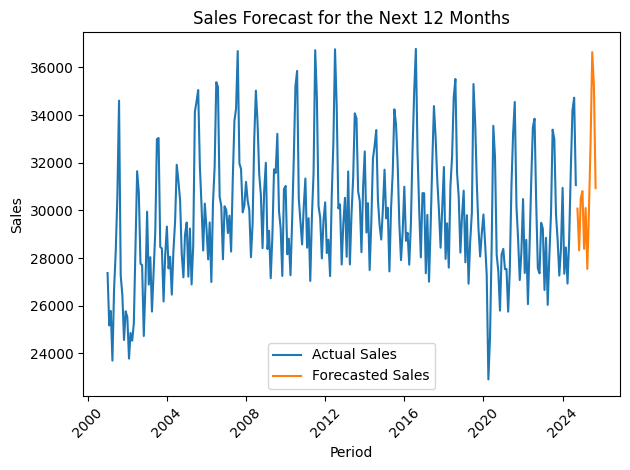

       period  Sales_forecast
0  2024-10-01    30079.523438
1  2024-11-01    28328.552734
2  2024-12-01    30516.562500
3  2025-01-01    30810.378906
4  2025-02-01    28389.783203
5  2025-03-01    30101.337891
6  2025-04-01    27549.148438
7  2025-05-01    29997.904297
8  2025-06-01    32904.046875
9  2025-07-01    36641.914062
10 2025-08-01    35221.769531
11 2025-09-01    30937.449219
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
       period  sales_forecast
0  2024-10-01    30079.523438
1  2024-11-01    28328.552734
2  2024-12-01    30516.562500
3  2025-01-01    30810.378906
4  2

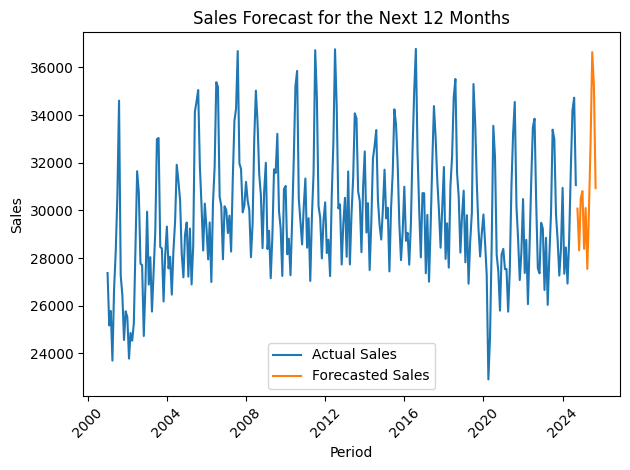

       period  Sales_forecast
0  2024-10-01    30079.523438
1  2024-11-01    28328.552734
2  2024-12-01    30516.562500
3  2025-01-01    30810.378906
4  2025-02-01    28389.783203
5  2025-03-01    30101.337891
6  2025-04-01    27549.148438
7  2025-05-01    29997.904297
8  2025-06-01    32904.046875
9  2025-07-01    36641.914062
10 2025-08-01    35221.769531
11 2025-09-01    30937.449219


In [ ]:
# Sector dropdown
sector_options = ['All','Commercial', 'Residential', 'Industrial', 'Transportation', 'other']
sector_dropdown = widgets.Dropdown(
    options=sector_options,
    value='All',
    description='Sector:',
    disabled=False,
)

# Field dropdown
field_options = ['Sales', 'Revenue', 'Customers','Price']
field_dropdown = widgets.Dropdown(
    options=field_options,
    value='Sales',
    description='Field:',
    disabled=False,
)

# Slider widget
periods_slider = widgets.IntSlider(
    min=1,
    max=24,
    step=1,
    value=12,
    description='Periods to Forecast:',
    continuous_update=False,  # Update only on release
)

# Display the widgets
display(sector_dropdown)
display(field_dropdown)
display(periods_slider)

def on_button_clicked(b):
    selected_sector = sector_dropdown.value
    selected_field = field_dropdown.value
    periods_to_predict = periods_slider.value

    z ='com' if selected_sector=='Commercial' else 'res' if selected_sector=='Residential' else 'ind' if selected_sector=='Industrial' else 'trns' if selected_sector=='Transportation' else 'othr'
    y=selected_field.lower()
    model_name = y+'_'+z+'_'+'model'
    if selected_sector=='All':
      if selected_field=='Price':
        matching_rows = model_df[model_df.index.str.contains('sales')]
        prd_sales = pd.DataFrame(columns=['period','sales_forecast'])
        for i in range(len(matching_rows)):
          model = matching_rows.iloc[i,0]
          prd1 = predictor(model,periods_to_predict)
          prd_sales = pd.concat([prd_sales,prd1])
        matching_rows = model_df[model_df.index.str.contains('revenue')]
        prd_revenue = pd.DataFrame(columns=['period','revenue_forecast'])
        for i in range(len(matching_rows)):
          model = matching_rows.iloc[i,0]
          prd1 = predictor(model,periods_to_predict)
          prd_revenue = pd.concat([prd_revenue,prd1])
        prd_sales = prd_sales.groupby('period').agg({'sales_forecast':'sum'}).reset_index()
        prd_revenue = prd_revenue.groupby('period').agg({'sales_forecast':'sum'}).reset_index()
        prd_revenue = prd_revenue.rename(columns={'sales_forecast': 'revenue_forecast'})
        prd = pd.merge(prd_sales,prd_revenue,how='inner',on='period')
        prd['price_forecast'] = prd['revenue_forecast']/prd['sales_forecast']
        # prd = prd[['period','price_forecast']]
      else:
        matching_rows = model_df[model_df.index.str.contains(selected_field.lower())]
        prd_sales = pd.DataFrame(columns=['period','sales_forecast'])
        for i in range(len(matching_rows)):
          model = matching_rows.iloc[i,0]
          prd1 = predictor(model,periods_to_predict)
          prd_sales = pd.concat([prd_sales,prd1])
        prd = prd_sales.groupby('period').agg({'sales_forecast':'sum'}).reset_index()
        prd = prd.rename(columns={'sales_forecast': selected_field+'_forecast'})
    else:
      if selected_field=='Price':
        matching_rows = model_df[model_df.index.str.contains('sales'+selected_sector.lower())]
        model = matching_rows.iloc[0,0]
        prd_sales = predictor(model,periods_to_predict)
        matching_rows = model_df[model_df.index.str.contains('revenue'+selected_sector.lower())]
        model = matching_rows.iloc[0,0]
        prd_revenue = predictor(model,periods_to_predict)
        prd_revenue = prd_revenue.rename(columns={'sales_forecast': 'revenue_forecast'})
        prd = pd.merge(prd_sales,prd_revenue,how='inner',on='period')
        prd['price_forecast'] = prd['revenue_forecast']/prd['sales_forecast']
      else:
        matching_rows = model_df[model_df.index.str.contains(model_name)]
        model = matching_rows.iloc[0,0]
        prd_sales = predictor(model,periods_to_predict)
        prd = prd_sales.rename(columns={'sales_forecast': selected_field+'_forecast'})
    print(prd)

# Create a button
button = widgets.Button(description="Predict")

# Attach the function to the button's on_click event
button.on_click(on_button_clicked)

# Display the button
display(button)